<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [ ]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, lil_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt
import re
from tqdm import tqdm_notebook, tnrange
import itertools
from datetime import datetime

In [ ]:
import sys
is_colab = 'google.colab' in sys.modules

In [ ]:
if is_colab:
    from google.colab import drive
    drive.mount('/gdrive')
    %cd /gdrive

In [ ]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'capstone_user_identification'
if is_colab:
    PATH_TO_DATA = '/gdrive/My Drive/Colab Notebooks/Stepik/6_reg/capstone_user_identification'

In [ ]:
def get_site_id(row, vocab_site):
    return vocab_site[row['site']][0]

In [ ]:
def get_site_id_v(col1, vocab_site):
    return vocab_site[col1][0]

In [ ]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    #''' ВАШ КОД ЗДЕСЬ'''
    #Load Vocab
    with open(site_freq_path, 'rb') as handle:
        vocab_site = pickle.load(handle)    
    
    ses_n = 0
    df_f = pd.DataFrame()
    
    for f in glob(os.path.join(path_to_csv_files, '*.csv')):
        df = pd.read_csv(f)

        #getting user_id
        fn = os.path.basename(f)
        user_id = int(re.search(r'\d{4}', fn).group())     

        for r in range(0, len(df), window_size):
            df_s = df.iloc[r:r+session_length].copy()['site'].value_counts().to_frame()
            df_s.reset_index(inplace=True)
            df_s.rename(columns={'site': 'site_freq', 'index': 'site'}, inplace=True)
            #df_s['site_id'] = site_vocab[df_s['site']][0]
            
            # df_s['site_id'] = df_s.apply(get_site_id, args=(vocab_site,), axis=1)
            vfunc = np.vectorize(get_site_id_v)
            df_s['site_id'] = vfunc(df_s['site'], vocab_site)
            
            df_s['session'] = ses_n
            df_s['user_id'] = user_id
            ses_n += 1
            
            df_f = df_f.append(df_s, ignore_index=True)     

    #print(df_f.shape)
    lil = lil_matrix((len(df_f['session'].unique()), len(vocab_site)))
    y = []

    for row in range(len(df_f['session'].unique())):
        df_s = df_f[df_f['session'] == row]
        y.append(df_s['user_id'].unique()[0]) #target

        for i, r in df_s.iterrows():
            lil[row, r['site_id']-1] = r['site_freq']
    return lil, y                    

In [ ]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    #''' ВАШ КОД ЗДЕСЬ'''
    #Load Vocab
    with open(site_freq_path, 'rb') as handle:
        vocab_site = pickle.load(handle)

    ses_n = 0
    np_f = np.zeros(4)

    for f in tqdm_notebook(glob(os.path.join(path_to_csv_files, '*.csv'))):
        #f_np = np.genfromtxt(f, delimiter=';')    
        df = pd.read_csv(f) #getting user data
        f_np = df.to_numpy()

        #getting user_id
        fn = os.path.basename(f)
        user_id = int(re.search(r'\d{4}', fn).group())         

        for r in range(0, len(f_np), window_size):
            s = f_np[r:r+session_length, 1]       
            sites , counts = np.unique(s, return_counts=True)
            s = np.concatenate((sites.reshape(-1,1), counts.reshape(-1,1)), axis=1)
            s = np.concatenate((s, np.array([user_id for i in range(len(s))]).reshape(-1,1)), axis=1)
            s = np.concatenate((s, np.array([ses_n for i in range(len(s))]).reshape(-1,1)), axis=1)
            
            np_f = np.vstack([np_f, s])
            ses_n += 1

    np_f = np.delete(np_f, 0, 0)
    vfunc = np.vectorize(get_site_id_v)
    np_f[:,0] = vfunc(np_f[:,0], vocab_site)


    lil = lil_matrix(( len(np.unique(np_f[:,3])), len(vocab_site))) # size: [sessions x sites]
    y = []


    first_y = True
    cur_ses = 0
    for r in np_f:
        lil[r[3], r[0]-1] = r[1]

        if cur_ses != r[3] or first_y:
            y.append(r[2])
            cur_ses = r[3]
            first_y = False      
    
    return lil, y

In [ ]:
%%time
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                                       session_length=5, window_size=3)


Wall time: 26 ms


In [ ]:
%%time
# users: 150, window_size: 10, ses_len: 15
lil, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'10users'), 
                                         os.path.join(PATH_TO_DATA,'site_freq_10users.pkl'),
                                         session_length=15, window_size=10)


Wall time: 17.4 s


**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [ ]:
%%time
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                                       session_length=5, window_size=3)


Wall time: 23 ms


In [ ]:
X_toy_s5_w3.todense()

matrix([[0., 3., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.],
        [3., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 1., 0., 0., 0., 0., 0., 2., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [2., 2., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [3., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 2., 1.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
y_s5_w3

[1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3]

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [ ]:
fp = '{0}users'
vocab_fn = 'site_freq_{0}users.pkl'
num_users = 10

#fp.format(num_users)
vocab_fn.format(num_users)


'site_freq_10users.pkl'

In [ ]:
%%time
import itertools
from datetime import datetime

X_parse_path = './'
if is_colab:
    X_parse_path = '/gdrive/My Drive/Colab Notebooks/Stepik/6_reg/'

it = 0
data_lengths = []

fp = '{0}users'
vocab_fn = 'site_freq_{0}users.pkl'

for num_users in [10, 150]:    
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            pkl_fn = os.path.join(X_parse_path,
                    'X_sparse_{0}users_s{1}_w{2}.pkl'.format(num_users, session_length, window_size))
            if not os.path.isfile(pkl_fn):            
                start_dt = datetime.now()
                print('users: {0}, window_size: {1}, ses_len: {2}'.format(num_users, window_size, session_length))

                X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,fp.format(num_users)), 
                                                              os.path.join(PATH_TO_DATA, vocab_fn.format(num_users)),
                                                              session_length=session_length, window_size=window_size)

                pkl_fn = os.path.join(X_parse_path,
                                    'X_sparse_{0}users_s{1}_w{2}.pkl'.format(num_users, session_length, window_size))
                with open(pkl_fn, 'wb')  as handler:
                    pickle.dump(X_sparse, handler)

                pkl_fn = os.path.join(X_parse_path,
                                    'y_sparse_{0}users_s{1}_w{2}.pkl'.format(num_users, session_length, window_size))            
                with open(pkl_fn, 'wb')  as handler:
                    pickle.dump(y, handler)     

                data_lengths.append(X_sparse.shape[0])            
                print(str(it) +': ' +str((datetime.now() - start_dt).seconds/60)) 
                print('---')    
                it += 1
            else:
                with open(pkl_fn, 'rb') as handle:
                    X_sparse = pickle.load(handle)
                data_lengths.append(X_sparse.shape[0])                

Wall time: 9.49 s


In [ ]:
data_lengths

[14061,
 20087,
 20087,
 20087,
 28118,
 28118,
 28118,
 28118,
 137019,
 195712,
 195712,
 195712,
 273957,
 273957,
 273957,
 273957]

In [ ]:
len(data_lengths)

16

**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [ ]:
check_arr = []
for i in data_lengths:
    if i not in check_arr:
        check_arr.append(i)
               
len(check_arr)        

6

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [ ]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [ ]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,100,66,10,4,10,10,4,10,79,10,31
1,65,62,126,243,10,24,40,741,32,1,31
2,1,4,1,1,8,87,65,97,225,1,31
3,104,876,104,1,1,1,1,355,18,9,31
4,102,1,8,522,33,30,921,292,109,292,31


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [ ]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [ ]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [ ]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

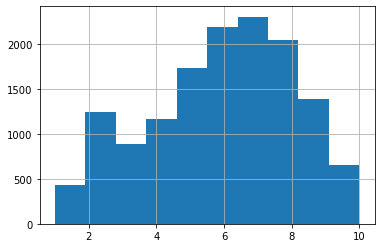

In [ ]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

In [ ]:
''' ВАШ КОД ЗДЕСЬ '''
stats.shapiro(num_unique_sites)

(0.9546933174133301, 0.0)

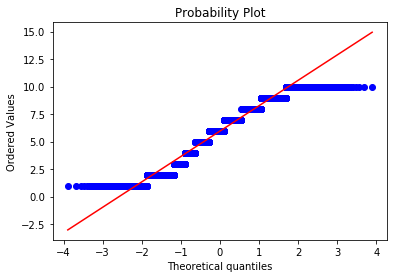

In [ ]:
stats.probplot(num_unique_sites, dist="norm", plot=plt)
plt.show()

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [ ]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [ ]:
pd.Series(has_two_similar).value_counts()[1]

13410

14061

In [ ]:
#''' ВАШ КОД ЗДЕСЬ '''
pi_val = stats.binom_test(has_two_similar.sum(), 
                          n=has_two_similar.shape[0], 
                          p=0.95, alternative='greater')
pi_val

0.02207653769072678

In [ ]:
round(pi_val,3)

0.022

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [ ]:
# ''' ВАШ КОД ЗДЕСЬ '''
wilson_interval = proportion_confint(has_two_similar.sum(), has_two_similar.shape[0], method='wilson')

In [ ]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

0.95 0.957


**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [ ]:
''' ВАШ КОД ЗДЕСЬ '''

In [ ]:
site_freqs = pd.Series(train_df.drop(columns='user_id').values.reshape(-1)).value_counts()

In [ ]:
site_freqs_1k = site_freqs[site_freqs>=1000]

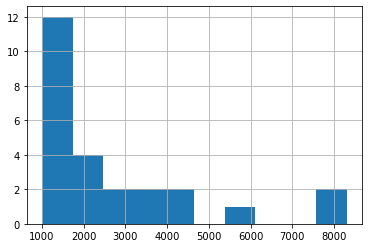

In [ ]:
site_freqs_1k.hist()

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [ ]:
import gc
gc.collect()

8447

In [ ]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [ ]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [ ]:
# ''' ВАШ КОД ЗДЕСЬ '''
bootstrat_data = list(map(np.mean, get_bootstrap_samples(site_freqs.values, n_samples=site_freqs.shape[0])))
#bootstrat_data = get_bootstrap_samples(site_freqs.values, n_samples=site_freqs.shape[0])
a = stat_intervals(bootstrat_data, 0.05)
a

array([22.51415344, 35.75545381])

In [ ]:
a[1] - a[0]

13.241300366300372

## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.